# Json dictionary and statistic
Data is often given under the format of a dictionary that you need to be able to acces. In this exercise, you need to extract the data from the dictionary plot the boxplots and print the basic statistic of the distributions.

The data is from the simulation of FRAP microscopy (Fluorescence Recovery After Photobleaching). It's a technique developed as a method to study protein mobility in living cells. An area is photobleached with a laser and the recovery of the fluorescence is measured.
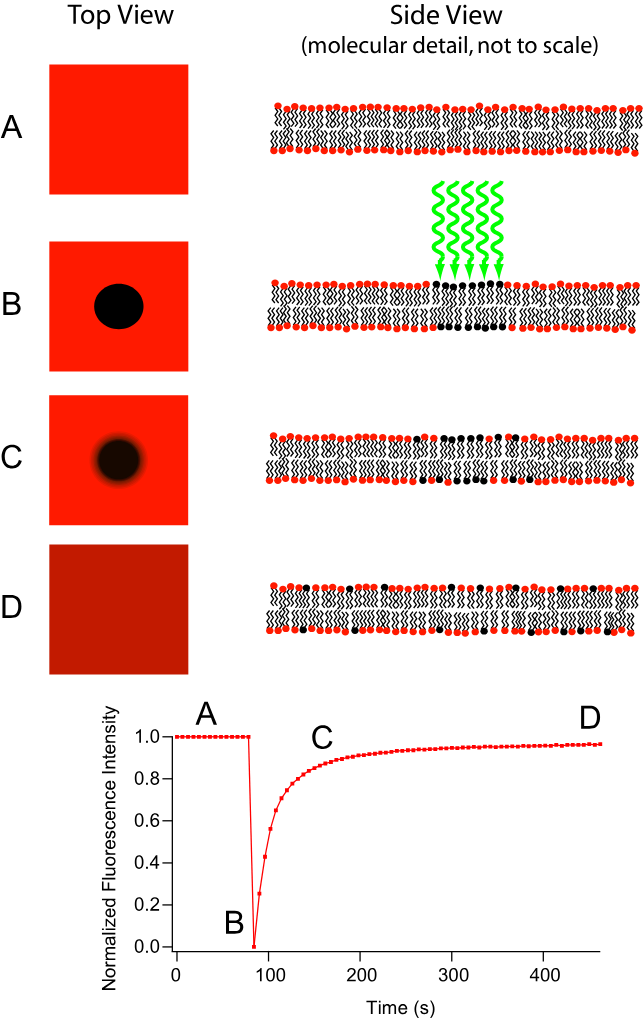

The dictionary is complex, the simulations where done for 4 protein diffusion coefficient and 10 times for each diffusion coefficient. For each test, the number of particules and the time constant $\tau_d$ (recovery in seconds) is given in a list. The format of a test looks like this: `"1e-12_0": [4.352496341691102, 0.0206]`. The key is `1e-12_0` and correspond to the test 0 of the diffusion coefficient equal to 1e-12 m²/s. The value of this key is the `[number_of_particules, tau_d]`.

Your task is to extract for each diffusion coefficient the number of particules and the time constant $\tau_d$. After, you need to plot the samples in a box plot for each diffusion coefficient. We seek a graph that looks like this:
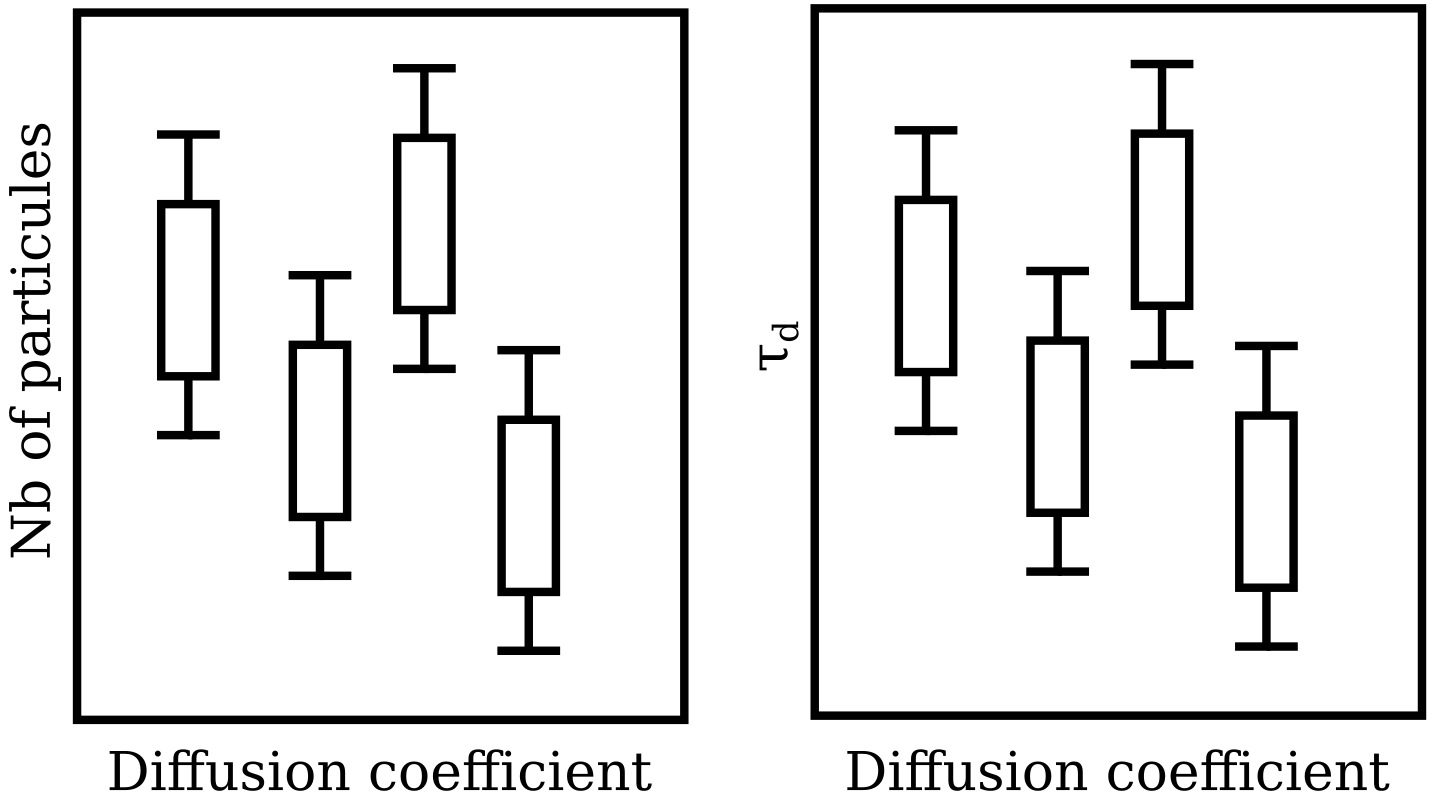
We also want the mean and standard deviation for each samples. You may use the documentation and Stackoverflow. Please do not use ChatGPT. This is the last project, try to reason in small steps to achive the main goal.

Advice:
- You want to open a dictionary, the module json might be usefull.
- For basic statistic, the module numpy will be enough.

In [1]:
# Import the modules
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open the file and load the data
with open("/home/antoine/Desktop/Python-Crash-Course/Project 3/data.txt",
          "r") as file:
    data = json.load(file)

In [3]:
# For loop used to assigned based on conditions in a list the data
sample1_particules = []
sample1_tau = []
sample2_particules = []
sample2_tau = []
sample3_particules = []
sample3_tau = []
sample4_particules = []
sample4_tau = []


for i in data.keys():
    if i.startswith("1e-13"):
        sample1_particules.append(data[i][0])
        sample1_tau.append(data[i][1])

    if i.startswith("1e-12"):
        sample2_particules.append(data[i][0])
        sample2_tau.append(data[i][1])

    if i.startswith("6e-12"):
        sample3_particules.append(data[i][0])
        sample3_tau.append(data[i][1])

    if i.startswith("1e-11"):
        sample4_particules.append(data[i][0])
        sample4_tau.append(data[i][1])

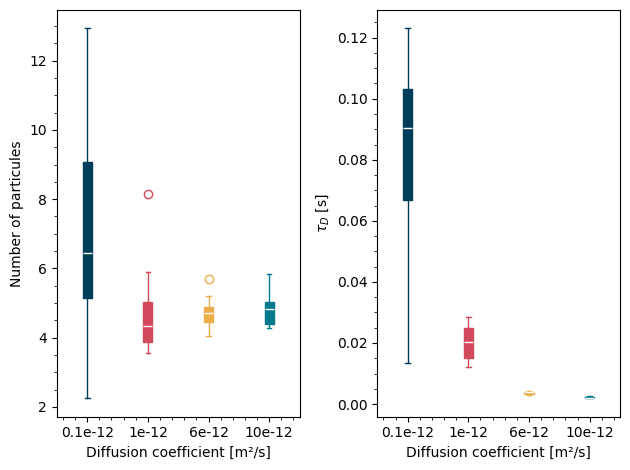

In [4]:
# Beautiful box plot

colors = ['#003D5B', '#D1495B', '#EDAE49', '#00798C', '#401F3E']

fig, (ax1, ax2) = plt.subplots(ncols=2)

particules_sample = [sample1_particules, sample2_particules, sample3_particules,
                    sample4_particules]
tau_samples = [sample1_tau, sample2_tau, sample3_tau, sample4_tau]

for _ in enumerate(particules_sample):
    ax1.boxplot(_[1], positions=[_[0]], patch_artist=True,
            boxprops=dict(facecolor=colors[_[0]], color=colors[_[0]]),
            capprops=dict(color=colors[_[0]]),
            whiskerprops=dict(color=colors[_[0]]),
            flierprops=dict(color=colors[_[0]], markeredgecolor=colors[_[0]]),
            medianprops=dict(color="white")
            )

for _ in enumerate(tau_samples):
    ax2.boxplot(_[1], positions=[_[0]], patch_artist=True,
            boxprops=dict(facecolor=colors[_[0]], color=colors[_[0]]),
            capprops=dict(color=colors[_[0]]),
            whiskerprops=dict(color=colors[_[0]]),
            flierprops=dict(color=colors[_[0]], markeredgecolor=colors[_[0]]),
            medianprops=dict(color="white")
            )

for j in [ax1, ax2]:
    j.minorticks_on()
    j.set_xticks([0, 1, 2, 3], ["0.1e-12", "1e-12", "6e-12", "10e-12"])
    j.set_xlabel("Diffusion coefficient [m²/s]")
ax1.set_ylabel("Number of particules")
ax2.set_ylabel(r"$\tau_D$ [s]")

plt.tight_layout()
plt.show()


In [5]:
# Stats
# Here I use a double loop, something that was not covered in the course. Your 
# solution can be different. The goal is only to maje you try the mean and std
# functions of numpy with a loop

print("--- Number of particules ---")
for (i, j) in zip(particules_sample, ["0.1e-12", "1e-12", "6e-12", "10e-12"]):
    print(f"{j}: {np.mean(i)} +- {np.std(i)}")

print("--- Time constant ---")
for (i, j) in zip(tau_samples, ["0.1e-12", "1e-12", "6e-12", "10e-12"]):
    print(f"{j}: {np.mean(i)} +- {np.std(i)}")



--- Number of particules ---
0.1e-12: 7.095563411623026 +- 3.043139179147676
1e-12: 4.748995552393042 +- 1.3280169155000454
6e-12: 4.725615605575185 +- 0.4579660740184652
10e-12: 4.864100218998891 +- 0.5171652180200571
--- Time constant ---
0.1e-12: 0.07887999999999999 +- 0.035430405021675944
1e-12: 0.019979999999999998 +- 0.005490136610322188
6e-12: 0.0037300000000000007 +- 0.0004100000000000001
10e-12: 0.00218 +- 0.00024413111231467413
